### Project 3
  


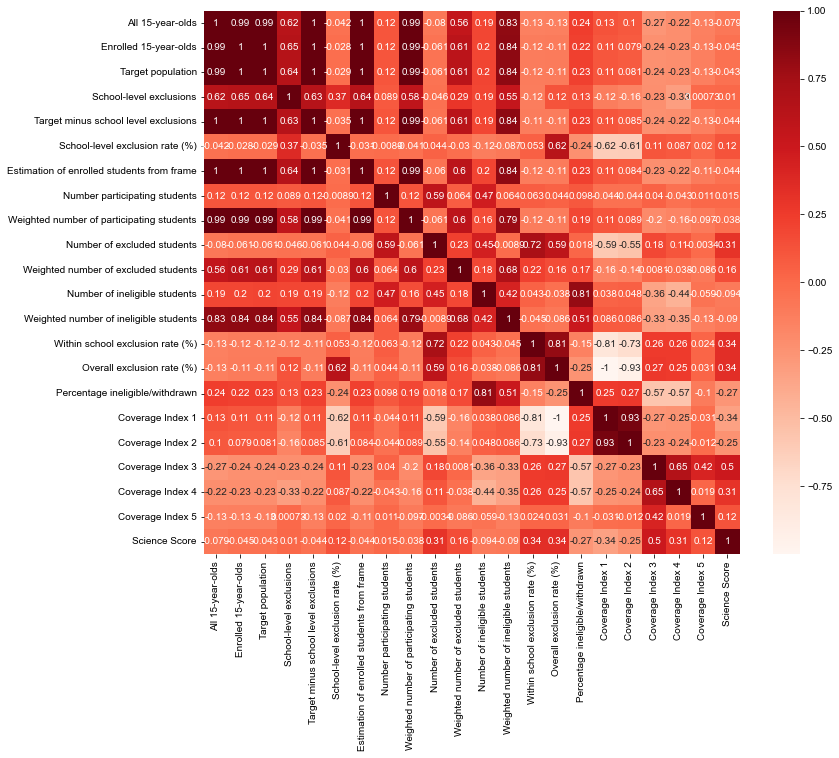

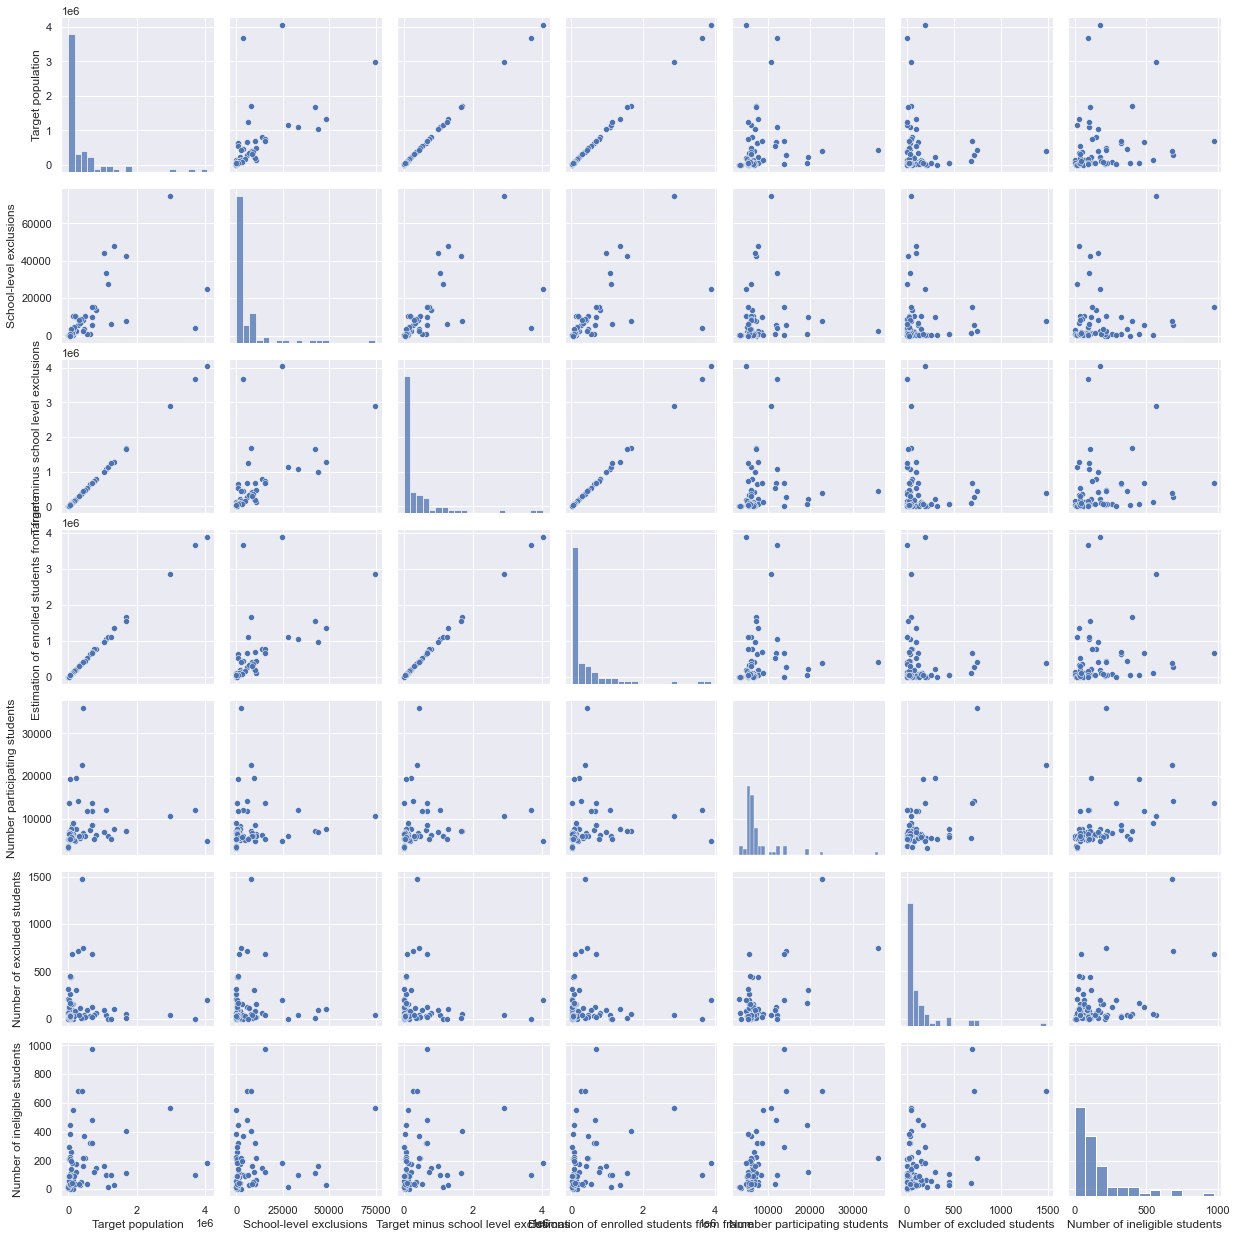

C:\Users\karrin3\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Science Score                                 1.000000
Coverage Index 3                              0.499700
Within school exclusion rate (%)              0.343422
Overall exclusion rate (%)                    0.341641
Coverage Index 4                              0.310658
Number of excluded students                   0.305872
Weighted number of excluded students          0.156932
School-level exclusion rate (%)               0.124237
Coverage Index 5                              0.122686
Number participating students                 0.014994
School-level exclusions                       0.010021
Weighted number of participating students    -0.037983
Target population                            -0.043341
Target minus school level exclusions         -0.043988
Estimation of enrolled students from frame   -0.044289
Enrolled 15-year-olds                        -0.045382
All 15-year-olds                             -0.078904
Weighted number of ineligible students       -0.090431
Number of 

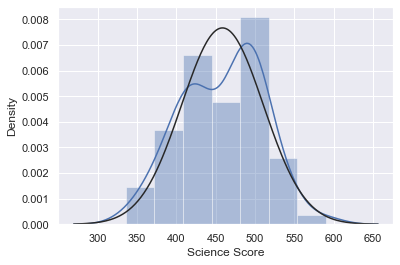

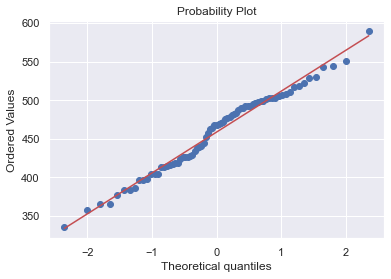

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r'C:\Users\karrin3\Downloads\Science-PISA2018_TechReport.csv')
#print (df)
#data.head()
data.describe()
#print(data.columns)

plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()

sns.set()
cols = ['Target population', 'School-level exclusions',
       'Target minus school level exclusions',
       'Estimation of enrolled students from frame',
       'Number participating students',
       'Number of excluded students',
       'Number of ineligible students']
sns.pairplot(data[cols], height = 2.5)
plt.show()

from scipy.stats import norm
from scipy import stats

sns.distplot(data['Science Score'], fit=norm)
fig = plt.figure()
res = stats.probplot(data['Science Score'], plot=plt)


features = data[['All 15-year-olds', 'Enrolled 15-year-olds',
       'Target population', 'School-level exclusions',
       'Target minus school level exclusions',
       'School-level exclusion rate (%)',
       'Estimation of enrolled students from frame',
       'Number participating students',
       'Weighted number of participating students',
       'Number of excluded students', 'Weighted number of excluded students',
       'Number of ineligible students',
       'Weighted number of ineligible students',
       'Within school exclusion rate (%)', 'Overall exclusion rate (%)',
       'Percentage ineligible/withdrawn', 'Coverage Index 1',
       'Coverage Index 2', 'Coverage Index 3', 'Coverage Index 4',
       'Coverage Index 5']]
output = data['Science Score']


corr_Math_Score=cor["Science Score"].sort_values(ascending=False)
print(corr_Math_Score)




In [2]:
# feature selection

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs


reg = LinearRegression() 
feature_selector = sfs(reg, k_features=5, forward=True, verbose=2, scoring='neg_mean_squared_error')
feature_selector = feature_selector.fit(features, output)

feat_names = list(feature_selector.k_feature_names_)
print(feat_names)
final_features = data[['School-level exclusions','Number of excluded students', 'Within school exclusion rate (%)','Coverage Index 3']]


x_train, x_test, y_train, y_test = train_test_split(final_features, output, test_size = 0.3, random_state = 100)
mlr = LinearRegression() 
mlr.fit(x_train, y_train)

print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(final_features, mlr.coef_))





[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2022-05-05 23:34:22] Features: 1/5 -- score: -2206.990158550527[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.0s finished

[2022-05-05 23:34:23] Features: 2/5 -- score: -2076.440596884752[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.0s finished

[2022-05-05 23:34:23] Features: 3/5 -- score: -2058.23345651481[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

['School-level exclusions', 'Number of excluded students', 'Within school exclusion rate (%)', 'Coverage Index 2', 'Coverage Index 3']
Intercept:  234.2376436995378
Coefficients:


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2022-05-05 23:34:23] Features: 4/5 -- score: -2047.3175468035856[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2022-05-05 23:34:23] Features: 5/5 -- score: -2051.670744782782

[('School-level exclusions', 0.00024794935352016054),
 ('Number of excluded students', 0.03327393905909393),
 ('Within school exclusion rate (%)', 6.702299245945651),
 ('Coverage Index 3', 235.91265920511648)]

In [3]:


y_pred_mlr= mlr.predict(x_test)

mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

mlr_diff.head()




,Actual value,Predicted value
57,426,411.688665
41,438,410.963898
20,522,484.116456
56,419,466.863816
32,529,455.576133


In [4]:
#Evaluating the Model

from sklearn import metrics


rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Root Mean Square Error:', rootMeanSqErr)


Root Mean Square Error: 63.693318050804315


In [5]:
#Lasso Regression

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(features, output, test_size = 0.3, random_state = 100)


df = data.iloc[: , :-1]
X_numerical = df.iloc[: , 1:].astype('float64')

#print(X_numerical)
list_numerical = X_numerical.columns
scaler = StandardScaler().fit(x_train[list_numerical]) 


x_train[list_numerical] = scaler.transform(x_train[list_numerical])

x_test[list_numerical] = scaler.transform(x_test[list_numerical])

reg = Lasso(alpha=.2)
reg.fit(x_train, y_train)
pred_train_lasso= reg.predict(x_train)

print('R squared training set', round(reg.score(x_train, y_train)*100, 2))
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))


R squared training set 65.4
27.944225435380858


In [6]:
#Ridge Regression
import numpy as np

 
from sklearn.linear_model import Ridge

df = data.iloc[: , :-1]
X_numerical = df.iloc[: , 1:].astype('float64')

#print(X_numerical)
list_numerical = X_numerical.columns
scaler = StandardScaler().fit(x_train[list_numerical]) 


x_train[list_numerical] = scaler.transform(x_train[list_numerical])

x_test[list_numerical] = scaler.transform(x_test[list_numerical])

ridge_model = Ridge(alpha=10)
ridge=ridge_model.fit(x_train , y_train)
ridge_predict = ridge.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,ridge_predict)))







29.31257946482372
